<a href="https://colab.research.google.com/github/MohammadRahavi/Life-Expectancy-Data/blob/main/Life_Expectancy_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Life Expectancy Visualization**

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer

# **Loading Dataset**

In [2]:
df=pd.read_csv("/content/Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# **Checking Shape of the Dataset**

In [3]:
df.shape

(2938, 22)

# **Checking all the Columns in the Dataset**

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# **Information about the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

# **Checking For Null Values**

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
i=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['Life expectancy ']=i.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=i.fit_transform(df[['Adult Mortality']])
df['Alcohol']=i.fit_transform(df[['Alcohol']])
df['Hepatitis B']=i.fit_transform(df[['Hepatitis B']])
df[' BMI ']=i.fit_transform(df[[' BMI ']])
df['Polio']=i.fit_transform(df[['Polio']])
df['Total expenditure']=i.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=i.fit_transform(df[['Diphtheria ']])
df['GDP']=i.fit_transform(df[['GDP']])
df['Population']=i.fit_transform(df[['Population']])
df[' thinness  1-19 years']=i.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=i.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=i.fit_transform(df[['Income composition of resources']])
df['Schooling']=i.fit_transform(df[['Schooling']])

In [9]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Count Number of Distinct Elements**

In [10]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          88
Measles                             958
 BMI                                609
under-five deaths                   252
Polio                                74
Total expenditure                   819
Diphtheria                           82
 HIV/AIDS                           200
GDP                                2491
Population                         2279
 thinness  1-19 years               201
 thinness 5-9 years                 208
Income composition of resources     626
Schooling                           174
dtype: int64

# **Checking For Duplicate Values**

In [11]:
df.duplicated().sum()

0

# **Compute pairwise correlation of columns**

In [12]:
df.corr().head()

Year  Life expectancy   Adult Mortality  infant deaths  \
Year              1.000000          0.169623        -0.078861      -0.037415   
Life expectancy   0.169623          1.000000        -0.696359      -0.196535   
Adult Mortality  -0.078861         -0.696359         1.000000       0.078747   
infant deaths    -0.037415         -0.196535         0.078747       1.000000   
Alcohol          -0.048168          0.391598        -0.190408      -0.113812   

                   Alcohol  percentage expenditure  Hepatitis B  Measles   \
Year             -0.048168                0.031400     0.089398 -0.082493   
Life expectancy   0.391598                0.381791     0.203771 -0.157574   
Adult Mortality  -0.190408               -0.242814    -0.138591  0.031174   
infant deaths    -0.113812               -0.085612    -0.178783  0.501128   
Alcohol           1.000000                0.339634     0.075447 -0.051055   

                      BMI   under-five deaths      Polio  Total expenditure  \
Year              0.108327           -0.042937  0.093820           0.081860   
Life expectancy   0.559255           -0.222503  0.461574           0.207981   
Adult Mortality  -0.381449            0.094135 -0.272694          -0.110875   
infant deaths    -0.227220            0.996629 -0.170674          -0.126564   
Alcohol           0.318070           -0.110777  0.213744           0.294898   

                  Diphtheria    HIV/AIDS       GDP  Population  \
Year                 0.133853  -0.139741  0.093351    0.014951   
Life expectancy      0.475418  -0.556457  0.430493   -0.019638   
Adult Mortality     -0.273014   0.523727 -0.277053   -0.012501   
infant deaths       -0.175156   0.025231 -0.107109    0.548522   
Alcohol              0.215242  -0.048650  0.318591   -0.030765   

                   thinness  1-19 years   thinness 5-9 years  \
Year                          -0.047592            -0.050627   
Life expectancy               -0.472162            -0.466629   
Adult Mortality                0.299863             0.305366   
infant deaths                  0.465590             0.471228   
Alcohol                       -0.416946            -0.405881   

                  Income composition of resources  Schooling  
Year                                     0.236333   0.203471  
Life expectancy                          0.692483   0.715066  
Adult Mortality                         -0.440062  -0.435108  
infant deaths                           -0.143663  -0.191757  
Alcohol                                  0.416099   0.497546

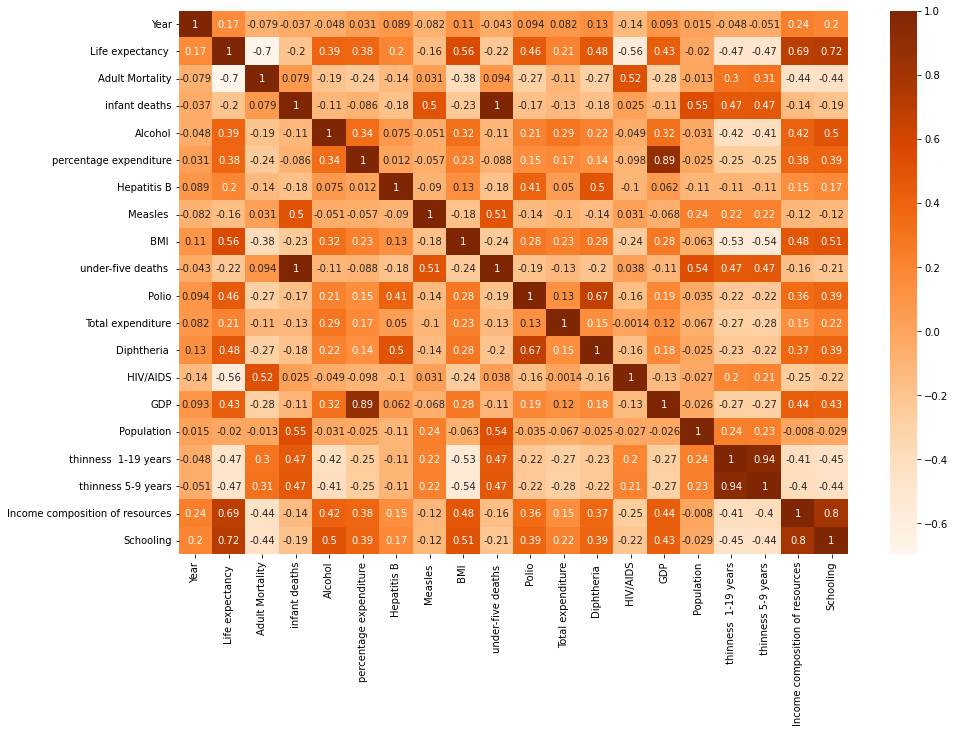

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Oranges")
plt.show()

# **Life Expentancy**

In [14]:
fig=px.histogram(df,x='Life expectancy ',template='ggplot2')
fig.show()

# **Country wise Life Expectancy over Years**

In [15]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='ggplot2',title='Country wise Life Expectancy over Years')
fig.show()

# **Decrease In Infant Deaths Increases Life Expectancy**

In [16]:
fig = px.scatter(df.sort_values(by='Year'),y='infant deaths',x='Life expectancy ',template='ggplot2',size='Year',color='Country',opacity=0.5,title='Life Expectancy Versus Infant Deaths of Countries in every Year')
fig.show()

# **Life expectancy versus Schooling of countries in every year**

In [17]:
fig = px.scatter(df.sort_values(by='Year'),y='Schooling',x='Life expectancy ',animation_frame='Year',animation_group='Country',template='ggplot2',color='Country',size='Life expectancy ',title='Life expectancy versus Schooling of countries in every year')
fig.show()

# **Life Expectancy Versus Adult Mortality in every year**

In [18]:
fig = px.scatter(df.sort_values(by='Year'),y='Adult Mortality',x='Life expectancy ',animation_frame='Year',animation_group='Country',color='Country',size='Life expectancy ',opacity=0.5,template='ggplot2',title='Life Expectancy Versus Adult Mortality in every year')
fig.show()

# **Life expectancy versus BMI of Countries in every Year**

In [19]:
fig = px.scatter(df.sort_values(by='Year'),y=' BMI ',x='Life expectancy ',animation_frame='Year',animation_group='Country',template='ggplot2',color='Country',size='Life expectancy ',opacity=0.5,title='Life expectancy versus BMI of Countries in every Year')
fig.show()

# **Life Expectancy Versus GDP of Countries in every Year**

In [20]:
fig = px.scatter(df.sort_values(by='Year'),y='GDP',x='Life expectancy ',animation_frame='Year',animation_group='Country',template='ggplot2',color='Country',size='Life expectancy ',title='Life Expectancy Versus GDP of Countries in every Year')
fig.show()